In [2]:
import mglearn

# Entry 23 - Scoring Classification Models - Theory

## The Problem

Classification models present a different challenge than regression models do. With regression, a number is returned. That number can then be compared to the observed numerical value and math done on the two. When the prediction is a class however, math can't be done on the direct results (if the classes are green, red, and purple, what's green minus red?). This results in a completely different set of metrics. These metrics revolve around the confusion matrix.

## Concepts

The datasets I work with are generally binary classification problems. As such, I'm going to focus on binary metrics, not multi-class.

One of the issues to watch out for with classification problems is **imbalanced classes**. This happens when one class is much more prevalent than the other.

When classifing the result of a [chess game](http://archive.ics.uci.edu/ml/datasets/Chess+%28King-Rook+vs.+King-Pawn%29) there will always be 1 winner and 1 loser, which results in a 50/50 mix of classes. When diagnosing [colic in horses](http://archive.ics.uci.edu/ml/datasets/Horse+Colic) however, there is the chance for a much lower positive rate (depending on the population of horses evaluated. If only horses suspected of having colic are included then the ratio will be more likely to be even or skewed toward positive. If the population includes all horses evaluated for any kind of medical problem then the ratio will be much more skewed toward negative).

The rate of occurance of the target value is called the **prevalence**. Knowing the prevalence is important in classification to help address class imbalance issues and gauge a baseline rate to improve upon over random guessing.

The **confusion matrix** counts how many predictions are correct or incorrect and lumps that information into four categories:

- **True Positive**: the prediction was positive and the observation was positive
- **True Negative**: the prediction was negative and the observation was negative
- **False Positive**: the prediction was positive and the observation was negative
- **False Negative**: the prediction was 
negative and the observation was positive

*[Introduction to Machine Learning with Python](https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413)* provides the following diagram:

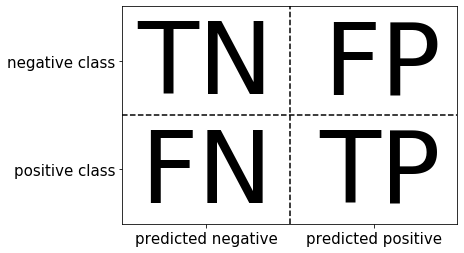

In [4]:
mglearn.plots.plot_binary_confusion_matrix()

This can be thought of as:

- The prediction was correct = True Positive and True Negative (main diagonal)
- The prediction was incorrect = False Positive and False Negative (off-diagonal)

Incorrect predictions each have their own label. 

- **Type I error**: False positive
- **Type II error**: False negative

Being able to differentiate between these types of errors is important for determining what metric to optimize for. The business objective will dictate which error type is more imporantant.

For example, with the [breast cancer dataset](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer) a false positive would mean that someone without cancer tested positive whereas a false negative would be someone with brest cancer who tested negative. In this situation the reprecrussions of not diagnosing someone with breast cancer are more severe than misdiagnosing someone without breast cancer. The metric chosen to evaluate the machine learning model should be biased toward finding more cancer than letting cancer go undiagnosed.

[Email spam detection](http://archive.ics.uci.edu/ml/datasets/Spambase) on the other hand, is the opposite. While a false positive still means that non-spam was identified as spam and a false negative means that spam was not identified as spam, the consequences are different. Here including a good email in the spam folder has higher reprecussions than letting some spam through. The metric here should be biased toward ensuring most or all good emails are retained instead of catching all spam.

## The Options

The confusion matrix, and most of the metrics that can be calculated from it, can be found on the [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix) Wikipedia page. Keep it handy to see how each metric fits with the four confusion matrix values.

![Confusion Matrix](https://raw.githubusercontent.com/julielinx/datascience_diaries/master/img/metric_explanatory_chart.PNG)

For the purposes of organization, I'm going to break the metrics into four categories. I haven't seen anyone else break them up this way, but I have to have some kind of structure to list them out.

The categories are based on the population they pull from (ie the denominator - the number on the bottom if it's been a minute since your last math course), which can be seen in the Wikipedia chart.

-  Based on the total population - the two boxes in the upper right corner of the Wikipedia chart and some extras
  - Prevalence
  - Accuracy (ACC)
  - Balanced accuracy (BA)
  - Jaccard index
  - No information rate
  - Zero one loss count
  - Zero one loss ratio
  - Cohen's Kappa
- Based on the prediction population - the four right hand boxes under `Predicted condition` and an extra
  - Precision / Positive predictive value (PPV)
  - Markedness
  - Negative predictive value (NPV)
  - False discovery rate (FDR)
  - False omission rate (FOR)
- Based on the observation population - the four bottom boxes under `True condition` and an extra
  - Recall / Sensitivity / True positive rate (TPR)
  - Informedness / Bookmaker informedness (BM)
  - Youden's J index (J)
  - Specificity / Selectivity / True negative rate (TNR)
  - False positive rate (FPR), Fall-out
  - False negative rate (FNR) / Miss rate
- Observation / prediction cross metrics - the four boxes in the lower right hand corner and some extras
  - $F_{1}$-score
  - Matthews correlation coefficient (MCC)
  - Threat score (TS) / Critical success index (CSI)
- Bonus
  - Precision / recall tradeoff

###  Based on the total population

#### Prevalence

This is how often the positive condition appears in the total population regardless of whether the prediction was correct or incorrect.

$prevalence = \frac{TP+FN}{TP+TN+FP+FN}$

#### Accuracy

This is a measure of how often the prediction was correct regardless of whether that correct prediction was for the positive or negative class.

$ACC = \frac{TP+TN}{TP+TN+FP+FN}$

Accuracy doesn't differentiate between the two types of errors, just that an error was made. This can be a good generic metric for balanced classes. However, when classes are imbalanced the usefullness declines, which is illustrated below in the second method of the no information rate.

#### Balanced accuracy

$BA = \frac{TPR+TNR}{2}$

#### Jaccard index

Per [Wikipedia](https://en.wikipedia.org/wiki/Jaccard_index), Jaccard index "is a statistic used for gauging the similarity and diversity of sample sets."

In practicality, it is the same as accuracy for the purposes of binary classification. The equation provided in [Scikit-Learn's documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#jaccard-similarity-score) is:

$J(y_{i}, \hat{y_{i}}) = \frac{| y_{i} \bigcap \hat{y_{i}} |}{| y_{i} \bigcup \hat{y_{i}} |}$

As a reminder $\bigcap$ is the intersection of two sets. I needed a picture to remember what this meant, so here is the graphic from the Wikipedia page:

![intersection of two sets](https://upload.wikimedia.org/wikipedia/commons/1/1f/Intersection_of_sets_A_and_B.svg)

$\bigcup$ is the union of two sets. Here is the graphic explanation commplimentary of Wikipedia:

![union of two sets](https://upload.wikimedia.org/wikipedia/commons/e/ee/Union_of_sets_A_and_B.svg)


For the purposes of binary classification, $| y_{i} \bigcap \hat{y_{i}} |$ is the same as the true condition (TP+TN) and $| y_{i} \bigcup \hat{y_{i}} |$ is the same as the total population (TP+TN+FP+FN). As such, the Jaccard index equation turns into $\frac{TP+TN}{TP+TN+FP+FN}$, which is the same as the equation for accuracy.

#### No information rate

This is the accuracy that can be achieved without a model. It gives a good baseline to compare a model against. The most straight forward calculation is the reciprocal of the number of classes (C), which gives an even chance of being predicted to each class:

*no information rate* $= \frac{1}{C}$

However, just like accuracy, this doesn't account for the frequency of the classes. Let's take a six sided die as an example. The straight forward calculation would be $\frac{1}{6}$. The result is the same regardless of whether the die is fair or weighted - say rigged to roll a 4 half the time. The simple no information would still be 16.67%. To account for these types of scenarios, an alternate calculation is available which just returns the percentage of the largest class:

*no information rate* $= max(\frac{count(c)}{n})$

For the die example, this alternative no information rate would be $\frac{1}{2}$ for the 4 it's rigged to roll.

#### Zero one loss count

This is the count of observations that were misclassified regardless of whether it was a type I or type II error. Based on my catagorization system, this metric by itself would probably go under cross metrics. However, it's companion metric, zero one loss ratio, is firmly in this category.

$zero \text{ } one \text{ } loss \text{ } count = FP + FN$

#### Zero one loss ratio

The misclassification rate - the inverse of accuracy. This takes the zero one loss count and divides it by the total population to give a ratio.

$zero \text{ } one \text{ } loss \text{ } ratio = \frac{FP + FN}{TP+TN+FP+FN}$

#### Cohen's Kappa / Kappa statistic

Instead of calculating accuracy and no information rate then comparing them, I could just take into account the class distrubutions.

Cohen's Kappa measures the inter-rater agreement (agreement between two raters) for categorical items. It's generally thought to be a more robust measure than simple percent agreement calculation, because it takes into account the possibility of the agreement occurring by chance. However, it's use is controversial due to difficulty interpreting indices of agreement.

Values range between -1 and 1 where 1 is perfect agreement, 0 is no agreement, and -1 is perfect negative agreement. To clarify, negative values indicate agreement lower than expected due to chance. Large negative values are rare with predictive models because they look for correlations with the target value and so shouldn't having findings opposite to the target value.

$kappa = \frac{O - E}{1 - E}$

Where

- $O$ = observed accuracy
- $E$ = expected accuracy based on the confusion matrix's marginal totals

According to *Applied Predictive Modeling*, reasonable levels of agreement range between 0.3 and 0.5, depending on context.

### Based on the prediction population

#### Precision / Positive predictive value (PPV)

This metric returns the rate of correctly identified positive predictions (of all positive predictions, how often was that prediction correct).

$precision = \frac{TP}{TP+FP} = 1 - FPR$

According to *Introduction to Machine Learning with Python*, I should use this metric to optimize for limiting false positives. From the examples earlier, I'd use this with the spam dataset.

*Applied Predictive Modeling* argues that predictive values, like PPV and the next metric NPV, aren't used to characterize a model very often. The reason for this is that prevalence (how often the true condition shows up in the dataset) tends to be dynamic in real world data. The example given in *Applied Predictive Modeling* is spam: "[...] the rate of spam emails increases when new schemes are invented but later fall off to baseline levels."

A dynamic nature of prevalence has also been my experience with real world data over moderate to longer periods of time. This is one of the reasons that models go stale: new patterns emerge.

Instead of precision, *Applied Predictive Modeling* recommends using specificity (see next section).

#### Markedness (MK)

As can be seen in the equation for precision, negatives aren't considered as part of the evaluation. Markedness takes precision and then includes a component to account for negatives. It is a measure of trustworthiness of positive *and* negative predictions.

$MK = \frac{TP}{TP+FP} - \frac{FN}{FN+TN} = PPV + NPV - 1$

#### Negative predictive value (NPV)

$NPV = \frac{TN}{FN + TN} = 1 - FOR$

#### False discovery rate (FDR)

$FDR = \frac{FP}{TP + FP} = 1 - PPV$

#### False omission rate (FOR)

$FOR = \frac{FN}{FN + TN} = 1 - NPV$

### Based on the observation population

#### Recall / Sensitivity / True positive rate (TPR)

This metric returns the rate of positive observations that were correctly identified (of all positive observations, how often were they correctly identified by the prediction). 

$recall = \frac{TP}{TP + FN} = 1-FNR$

According to *Introduction to Machine Learning with Python* page 289, I should use this metric to optimize for identifying all positive observations and limiting false negatives. From the examples earlier, I'd use this with the breast cancer dataset.

Recall and precision can be easy to mix up - their equations are only one letter different afterall. The way to keep them straight is to remember that precision is looking at the rate of correct answers within the population of predictions, whereas recall is looking at the rate of correct answers within the population of observations.

#### Informedness / Bookmaker Informedness (BM)

Just like with precision, recall doesn't account for the negatives. Informedness does for recall what markedness does for precision - it takes the negatives into account.

$BM = \frac{TP}{TP+FN} - \frac{FN}{TN+FP} = TPR + TRN - 1$

#### Youden's J index

Like the F1-score, this metric provides a single value that takes into consideration two other metrics. Youden's J reflects both false-positve and false-negative rates.

It gives equal weight to false positive and false negative values. Often used in conjunction with the receiver operating characteric (ROC) analysis, which will be covered in <font color='red'>Entry 26</font>.

Value range from 0 through 1 (inclusive). 0 gives the same proportion of positive results for groups with and without the condition, i.e the test is useless. A value of 1 indicates that there are no false positives or false negatives, i.e. the test is perfect.

$J = sensitivity + specificity - 1$

*Note*, this is the same as informedness.

#### Specificity (SPC) / True negative rate (TNR)

A kind of opposite of recall is specificity. This metric measures the rate that negative observations are correctly identified (of all negative observations, how often were they correctly identified by the prediction)

$specificity = \frac{TN}{TN + FP} = 1 - FPR$

#### False positive rate (FPR), fall-out

This is the inverse of specificity - defined as one minus the specificity.

$FPR = 1 - \frac{TN}{TN + FP} = 1 - TNR$

#### False negative rate (FNR) / Miss rate

$FNR = \frac{FN}{TP + FN} = 1 - TPR$

### Observation / prediction cross metrics

#### F1-score

This is the harmonic mean of precision and recall. [Hands-On Machine Learning with Scikit-Learn & TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291) gives the following information on *harmonic mean* on page 86:

> Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high $F_{1}$ score if both recall and precision are high.

$F_{1} = 2 \times (\frac{precision \times recall}{precision + recall}) = \frac{2TP}{2TP+FP+FN}$

According to *Introduction to Machine Learning with Python* page 290, this metric can be a better metric than accuracy on imbalanced binary classification data. It gives a single value option which considers both precision and recall.

Score ranges between 0 and 1 where 0 is the worst performance and 1 is perfect precision and sensitivity.

The major drawback of the F1-score is that it's harder to intrepret and explain than the other metrics.

#### Matthews correlation coefficient

In essence this metric is a correlation coefficient that measures the quality of binary classifications **regardless of class imbalance**. I talked about correlation back in <font color='red'>Entry 6</font>.

Matthews correlation coefficient returns a value between +1 and -1. A  value of 1 represents a perfect prediction, 0 no better than random prediction and −1 indicates total disagreement between prediction and observation. Based on the values, this metric seems very similar to Cohen's Kappa. It will be interesting to see how these two vary when run on actual data.

$MCC = \frac{TP \times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$

#### Threat score (TS) / Critical success index (CSI)

$TS = \frac{TP}{TP+FN+FP}$

### Bonus

#### The precision / recall tradeoff

No discuss of classification metric is complete without discussing the precision / recall tradeoff.

I like the chart in *Hands-On Machine Learning with Scikit-Learn & TensorFlow*.

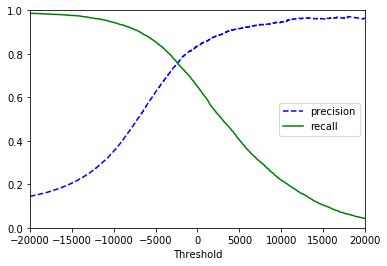

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = y_train=='5'

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center right')
    plt.ylim([0, 1])
    plt.xlim([-20000, 20000])

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

On the far left recall is at 100%. This means that all positive observations were identified. While recall is perfect, it's easy to see that percision is at its lowest. This is because to grab all positive observations compromises had to be made which allowed more false positives through.

On the far right precision is at its highest. This means that the majority of positive predictions were in fact positive observations. However, recall is at an ultimate low. This is because in order to remove all false positivies limitations had to be set which moved many positive predictions into the false negative camp.

The precision and recall vs threshold chart won't always be so pretty. For example, the one I showed above from *Hands-On Machine Learning* gets really bumpy on precision out past 20,000. But this is how the concept works.

For more detail, see *Hands-On Machine Learning* (edition 1 or 2).

**Side note**: in the precision section I noted that *Applied Predictive Modeling* recommended using recall (sensitivity) and specificity. As he noted that there is a tradeoff between sensitivity and specificity, I assume plotting the two agaist each other would result in around the same chart as that for precision and recall. Sounds like an interesting exercise to try once I start playing with real data.

## The Proposed Solution

There are 22 metrics listed on this page. That’s a lot of metrics.

Due to the imbalanced nature of the datasets I generally work with, I pulled out metrics highly susceptible to imbalance (accuracy). From the remaining metrics I chose ones that seemed the most interesting/informative. I managed to halve the list through this process:

- No information rate
- Cohen’s Kappa
- Precision
- Markedness
- Recall
- Informedness
- Specificity
- F1-score
- Youden’s J index
- Matthews correlation coefficient
- Critical success index

## The Fail

You may be thinking to yourself "But wait Julie, you didn't cover ROC/AUC." Don't worry, that's next.



## Up Next

Chosing classification thresholds

### Resources

- [Introduction to Machine Learning with Python](https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413)
- [Applied Predictive Modeling](https://www.amazon.com/Applied-Predictive-Modeling-Max-Kuhn-ebook/dp/B00K15TZU0)
- [Hands-On Machine Learning with Scikit-Learn & TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291)
- [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
- [3.3.2. Classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
- [API Reference](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
- [Informedness and Markedness](https://medium.com/@rvprasad/informedness-and-markedness-20e3f54d63bc)
- [Evaluation: From Precision, Recall and F-Factor to ROC, Informedness, Markedness & Correlation](https://csem.flinders.edu.au/research/techreps/SIE07001.pdf), looks like there's a newer version [here](https://bioinfopublication.org/files/articles/2_1_1_JMLT.pdf)